In [46]:
import os
import sys
import importlib

import pandas as pd
import numpy as np
import sklearn.model_selection as sel
import sklearn.metrics as metrics
import sklearn.ensemble as ensemble
import seaborn as sb

from sklearn import svm


# add project modules to the path
path_to_module = os.path.abspath(os.path.join(os.getcwd(),"..","src/"))
sys.path.append(path_to_module)

import src.models.train_model as train

I'm now repeating code a lot here, bad! Will need to write bits of this

In [2]:
path_to_data = os.path.abspath(os.path.join(os.getcwd(),
                                            "..",
                                            "data/processed/"
                                           ))

data_dict = train.load_processed_data(file_path=path_to_data)

loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed: 100%|██████████| 4/4 [00:00<00:00, 56.19it/s]


In [3]:
X = data_dict["X_train"]
y = data_dict["y_train"]

In [4]:
X_train, X_test, y_train, y_test = sel.train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

In [5]:
X_train_smol, X_test_smol, y_train_smol, y_test_smol = sel.train_test_split(X,
                                                    y,
                                                    test_size=0.09,
                                                    train_size=0.21,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

In [16]:
rf_clf = ensemble.RandomForestClassifier(
                                         random_state=42,
                                         verbose=True,
                                         class_weights="balanced")

TypeError: __init__() got an unexpected keyword argument 'class_weights'

In [47]:
rf_params = {"n_estimators": [100,200,500,1000,2000, 5000],
            }

In [48]:
grid_search = sel.GridSearchCV(estimator=rf_clf, 
                               param_grid=rf_params,
                               scoring = "f1_macro",
                               n_jobs = 2,
                               cv=3,
                               verbose = 10
                              )

In [40]:
grid_search.fit(X_train_smol, y_train_smol)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   34.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 15.5min
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed: 35.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed: 16.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=True, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'

In [41]:
grid_search.best_params_

{'n_estimators': 2000}

In [42]:
grid_search.best_score_

0.9292032870739455

the biggest model is bestest.

In [44]:
rf_results_df = pd.DataFrame(grid_search.cv_results_)

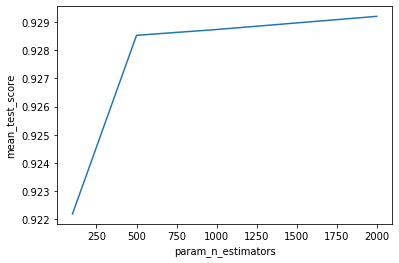

In [49]:
sb.lineplot(x="param_n_estimators", y="mean_test_score",data=rf_results_df)

basically, little change from 500 onward, lets explore in more detail

In [50]:
rf_params = {"n_estimators": [x for x in range(100,1600,100)],
             
            }

In [51]:
grid_search = sel.GridSearchCV(estimator=rf_clf, 
                               param_grid=rf_params,
                               scoring = "f1_macro",
                               n_jobs = 2,
                               cv=3,
                               verbose = 10
                              )

In [52]:
grid_search.fit(X_train_smol, y_train_smol)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   37.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 12.9min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 26.3min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 43.9min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 73.5min
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed: 105.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1300 out of 1300 | elapsed: 11.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=True, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'

In [53]:
rf_results_df = pd.DataFrame(grid_search.cv_results_)

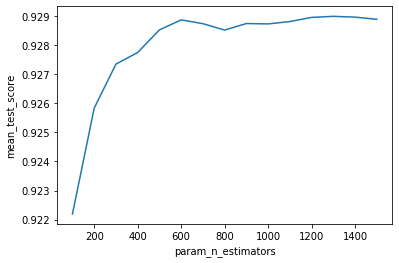

In [54]:
sb.lineplot(x="param_n_estimators", y="mean_test_score",data=rf_results_df)

we don't get much improvement above 700.
Criterieon don't ususlly do much, but we can see if there are improvements

In [55]:
rf_params = {"n_estimators": [400, 500, 600, 700],
             "criterion": ["gini", "entropy"]
            }

In [56]:
grid_search = sel.GridSearchCV(estimator=rf_clf, 
                               param_grid=rf_crit_params,
                               scoring = "f1_macro",
                               n_jobs = 2,
                               cv=3,
                               verbose = 10
                              )

In [57]:
grid_search.fit(X_train_smol, y_train_smol)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  5.6min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 37.9min
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed: 62.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  4.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=True, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'

In [58]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 600}

In [60]:
grid_search.best_score_

0.9288755304279496

In [61]:
rf_results_df = pd.DataFrame(grid_search.cv_results_)

In [62]:
rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,144.270923,5.409939,2.021882,0.025034,gini,400,"{'criterion': 'gini', 'n_estimators': 400}",0.926505,0.930711,0.926041,0.927752,0.002101,4
1,172.491786,1.575095,2.581618,0.061082,gini,500,"{'criterion': 'gini', 'n_estimators': 500}",0.927876,0.930425,0.927289,0.928530,0.001361,2
2,202.282710,1.516587,2.879450,0.012518,gini,600,"{'criterion': 'gini', 'n_estimators': 600}",0.928345,0.930970,0.927311,0.928876,0.001540,1
3,484.423369,3.940132,1.790881,0.034414,entropy,400,"{'criterion': 'entropy', 'n_estimators': 400}",0.927486,0.929197,0.925000,0.927228,0.001723,6
4,591.959219,0.729666,2.214867,0.000445,entropy,500,"{'criterion': 'entropy', 'n_estimators': 500}",0.927885,0.929586,0.924958,0.927476,0.001911,5
5,725.196746,6.079409,2.735804,0.258992,entropy,600,"{'criterion': 'entropy', 'n_estimators': 600}",0.928004,0.929770,0.925699,0.927824,0.001667,3


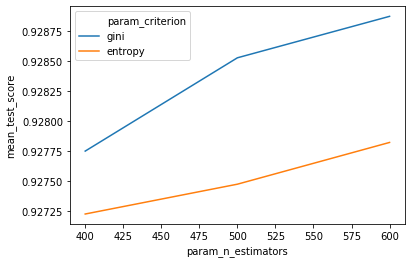

In [64]:
sb.lineplot(x="param_n_estimators", 
            y="mean_test_score",
            hue = "param_criterion",
            data=rf_results_df)

gini is marginally, but consistently better. 

In [68]:
rf_features_params = {"n_estimators": [400, 500, 600, 700],
             "criterion": ["gini"],
             "max_features": ["auto", "sqrt", "log2", None]
            }



In [71]:
grid_search = sel.GridSearchCV(estimator=rf_clf, 
                               param_grid=rf_features_params,
                               scoring = "f1_macro",
                               n_jobs = 2,
                               cv=3,
                               verbose = 10
                              )

In [72]:
grid_search.fit(X_train_smol, y_train_smol)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  5.1min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 22.2min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 34.1min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 43.8min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 71.4min
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed: 215.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  5.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=True, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'

In [73]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 600}

In [75]:
grid_search.best_score_

0.9288755304279496